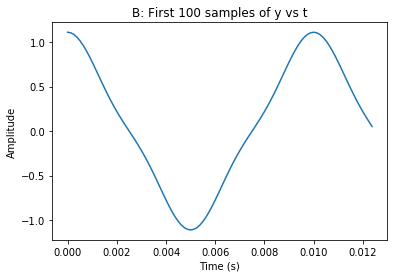

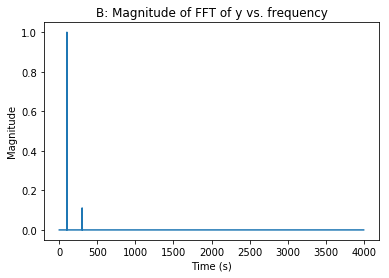

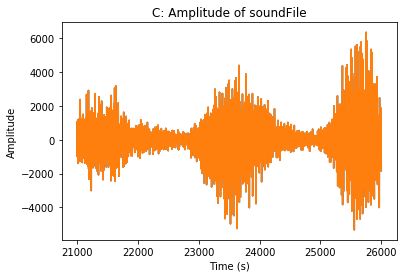

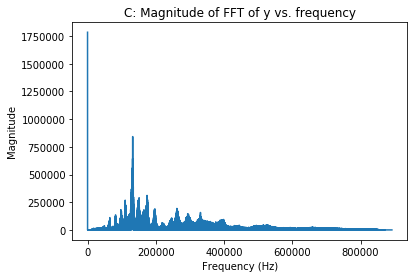

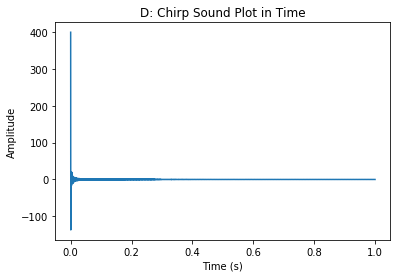

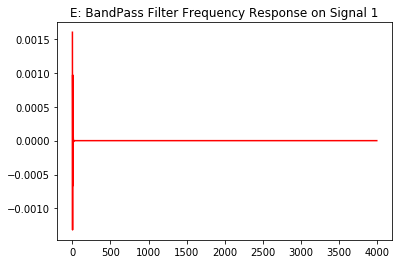

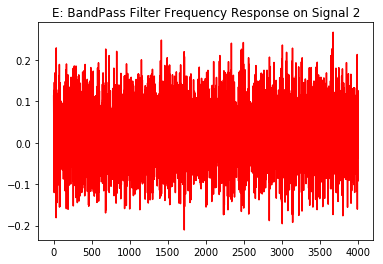

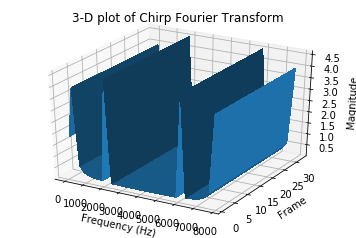

In [66]:
#Fourier Series
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.io.wavfile
import scipy.signal
import random
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def cosine(amp, freq, phs, x):
    return amp*(np.cos((freq*x)-phs))

#Fourier Series for Triangle Wave
#variables set before hand as in lab description
fund_f = 2*np.pi*100
a = [1, 0, 1/9]

t = np.arange(0 ,1, 0.000125)

#series a_2 has a value of zero so adding both a_2 and a_3
y = cosine(a[0], fund_f, 0, t)
y += cosine(a[1], 2*fund_f, 0, t)
y += cosine(a[2], 3*fund_f, 0, t)
    
FFT = np.absolute(np.fft.fft(y)*2*1/8000)
freq_spacing = np.arange(0,4000, 8000/8000)
FFT_trunc = [None]*4000
for i in range(0, int(len(FFT)/2)):
    FFT_trunc[i] = FFT[i]

plt.figure()
plt.plot(t[0:100], y[0:100])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("B: First 100 samples of y vs t")

plt.figure()
plt.plot(freq_spacing, FFT_trunc)
plt.xlabel("Time (s)")
plt.ylabel("Magnitude")
plt.title("B: Magnitude of FFT of y vs. frequency")

#C: Spectral Analysis of Speech
rate, data = scipy.io.wavfile.read("./soundfile_8k.wav")
data_sample = data[21000:26000]

plt.figure()
plt.plot(np.arange(21000, 26000, 1), data_sample)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("C: Amplitude of soundFile")

track = data.T[0] #gets the first channel of the soundfile
normalized_track = [(sound/2**8.)*2-1 for sound in track] #Used a converter to convert mp3 to 8-bit wav file must normalize it to (-1,1)
FFT_track = np.fft.fft(normalized_track) #calculate fourier transform of the sound signal
length_track = len(FFT_track)/2  #since the signal is mirrored only need the first half
FFT_track_abs = np.absolute(FFT_track[:int((length_track-1))])

plt.figure()
plt.plot(FFT_track_abs) 
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("C: Magnitude of FFT of y vs. frequency")
plt.show()

#Guess for the vowel is soft "ah"
#Turns out to sound more like a trumpet?

#D: Creation of Chirp Sound
#using the same t value as before
frequency_vals = np.arange(200,2000,(2000-200)/len(t))
y = None
i = 0
for freq in frequency_vals:
    if i == 0:
        i += 1
        y = cosine(1/20, 2*np.pi*freq, 0, t)
    else:
        y += cosine(1/20, 2*np.pi*freq, 0, t)

plt.figure()
plt.plot(t, y)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("D: Chirp Sound Plot in Time")

scipy.io.wavfile.write("./Chirp.wav", len(y), y)


#E: Filtering

#defining a helper function for butterworth bandpass filters
def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyq = 0.5*fs
    low = lowcut/nyq
    high = highcut/nyq
    b, a = scipy.signal.butter(order, [low, high], btype='band', analog=True)
    y = scipy.signal.lfilter(b, a, data)
    return y

fs = 8000
lowcut = 0.4*8000/2
highcut = 0.6*8000/2

y_e1 = [0] * 8000
y_e1[0] = 1

y_e2 = [0] * 8000
for i in range(0, int(len(y_e2))):
    y_e2[i] = random.randint(1,101)

filtered_1 = butter_bandpass_filter(y_e1, lowcut, highcut, fs)[0:4000]
filtered_2 = butter_bandpass_filter(y_e2, lowcut, highcut, fs)[0:4000]

plt.figure()
plt.plot(filtered_1, 'r')
plt.title("E: BandPass Filter Frequency Response on Signal 1")

plt.figure()
plt.plot(filtered_2, 'r')
plt.title("E: BandPass Filter Frequency Response on Signal 2")

FFT_1 = np.fft.fft(filtered_1) #calculate fourier transform of the sound signal
length_1 = len(FFT_1)/2  #since the signal is mirrored only need the first half
FFT_1_abs = np.absolute(FFT_1[:int((length_1-1))])

'''
plt.figure()
plt.plot(FFT_1_abs) 
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("E: Magnitude of FFT Signal 1")
plt.show()
'''

FFT_2 = np.fft.fft(filtered_2) #calculate fourier transform of the sound signal
length_2 = len(FFT_2)/2  #since the signal is mirrored only need the first half
FFT_2_abs = np.absolute(FFT_2[:int((length_2-1))])

'''
plt.figure()
plt.plot(FFT_2_abs) 
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("E: Magnitude of FFT Signal 1")
plt.show()
'''

#F: Spectrogram - (Bonus)

#signal to use is "Chirp" from part D which is "y"

#extract the first 1024 in a set of values
extract = [0]*1024
for i in range(0, int(len(extract))):
    extract[i] = y[i]

#reshape the y array into a 32x32 array
square_array = [[0]*32]*32
for i in range(0, int(len(square_array))):
    for j in range(0, int(len(square_array[i]))):
        square_array[i][j] = extract[32*i + j]

#make an fft from the values given
transform = np.absolute(np.fft.fft(square_array))

#make a 32x32 meshgrid of frequencies 0 to 8000 spaced by 8000/32 in one
#direction and 1 to 32 in other direction values will be xx and yy
xx = np.arange(0, 8000, 8000/32)
yy = np.arange(1, 33, 1)

xx, yy = np.meshgrid(xx, yy)

#3-D lit surface plot of the FFT vs. frames and frequencies
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, transform,
linewidth=0, antialiased=False)

#add appropriate axies to the plot
plt.title("3-D plot of Chirp Fourier Transform")
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Frame')
ax.set_zlabel('Magnitude')
plt.show()    

